# EXPLANATORY DATA ANALYSIS WITH PYTHON - OLYMPICS DATASET

In this project, I will be analyzing the the olympics dataset, which is a test/practice/assessment from one of my online courses. The olympics (36,931rows, 13 columns within the years 1896 to 2014) dataset will be formed from 3 major dataset; The summer olympics games, the winter olympics games and a df that contains some Economic parameters (population, GDP) of the participating countries as this will be used for analysis.

# Questions
1. Top 10 successful countries considering various parameters.
2. Gender based performance/Success
3. Does geographical location & Edition determine success?
4. The relationship between Economic parameter and success

In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing the dataframe
winter = pd.read_csv("winter.csv")
summer = pd.read_csv("summer.csv")
parameters = pd.read_csv("dictionary.csv")

In [3]:
#adding the column "Edition" to the dataframe to serve as differentiator
summer["Edition"] = "summer"
winter["Edition"] = "winter"

In [4]:
# concatenating the 2 dfs  
olympics = pd.concat([summer,winter], ignore_index = True)

In [5]:
olympics.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal,Edition
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,summer
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,summer
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,summer
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,summer


In [6]:
parameters.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [7]:
#re-naming the "country" to "code" in olympics so as to match the parameters
olympics.rename(columns = {"Country":"Code"}, inplace = True)

In [8]:
#overwriting the olympics dataframe by merging the parameters to existing olympics using the column code to merge.
olympicin = olympics.merge(parameters, on = "Code")

In [11]:
olympicsle = olympics.merge(parameters, how = 'left', on = "Code")

In [14]:
olympicsri = olympics.merge(parameters, how = 'right', on = "Code")

In [19]:
olympicsou = olympics.merge(parameters, how = 'outer', on = "Code")

In [20]:
olympicsou

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Population,GDP per Capita
0,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer,Hungary,9844686.0,12363.543460
1,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,summer,Hungary,9844686.0,12363.543460
2,1896.0,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,summer,Hungary,9844686.0,12363.543460
3,1896.0,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,summer,Hungary,9844686.0,12363.543460
4,1896.0,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,summer,Hungary,9844686.0,12363.543460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37001,NaN,NaN,NaN,NaN,NaN,SOM,NaN,NaN,NaN,NaN,Somalia,10787104.0,549.266977
37002,NaN,NaN,NaN,NaN,NaN,SWZ,NaN,NaN,NaN,NaN,Swaziland,1286970.0,3200.143018
37003,NaN,NaN,NaN,NaN,NaN,TKM,NaN,NaN,NaN,NaN,Turkmenistan,5373502.0,6672.477544
37004,NaN,NaN,NaN,NaN,NaN,VAN,NaN,NaN,NaN,NaN,Vanuatu,264652.0,2805.314644


In [15]:
olympicsri

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Population,GDP per Capita
0,2008.0,Beijing,Taekwondo,Taekwondo,"NIKPAI, Rohullah",AFG,Men,- 58 KG,Bronze,summer,Afghanistan,32526562.0,594.323081
1,2012.0,London,Taekwondo,Taekwondo,"NIKPAI, Rohullah",AFG,Men,58 - 68 KG,Bronze,summer,Afghanistan,32526562.0,594.323081
2,NaN,NaN,NaN,NaN,NaN,ALB,NaN,NaN,NaN,NaN,Albania,2889167.0,3945.217582
3,1984.0,Los Angeles,Boxing,Boxing,"ZAOUI, Mohamed",ALG,Men,71-75KG,Bronze,summer,Algeria,39666519.0,4206.031232
4,1984.0,Los Angeles,Boxing,Boxing,"MOUSSA, Mustapha",ALG,Men,75 - 81KG (Light-Heavyweight),Bronze,summer,Algeria,39666519.0,4206.031232
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30634,2004.0,Athens,Aquatics,Swimming,"COVENTRY, Kirsty",ZIM,Women,200M Individual Medley,Bronze,summer,Zimbabwe,15602751.0,924.143819
30635,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",ZIM,Women,100M Backstroke,Silver,summer,Zimbabwe,15602751.0,924.143819
30636,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",ZIM,Women,200M Backstroke,Gold,summer,Zimbabwe,15602751.0,924.143819
30637,2008.0,Beijing,Aquatics,Swimming,"COVENTRY, Kirsty",ZIM,Women,200M Individual Medley,Silver,summer,Zimbabwe,15602751.0,924.143819


In [12]:
olympicsle

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,summer,Austria,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,summer,Greece,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,summer,Greece,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,summer,Greece,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36930,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,winter,United Kingdom,65138232.0,43875.969614
36931,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,winter,United States,321418820.0,56115.718426
36932,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,winter,Canada,35851774.0,43248.529909
36933,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,winter,Czech Republic,10551219.0,17548.338213


In [10]:
olympicin

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Population,GDP per Capita
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer,Hungary,9844686.0,12363.54346
1,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,summer,Hungary,9844686.0,12363.54346
2,1896,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,summer,Hungary,9844686.0,12363.54346
3,1896,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,summer,Hungary,9844686.0,12363.54346
4,1896,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,summer,Hungary,9844686.0,12363.54346
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30563,1980,Lake Placid,Skiing,Alpine Skiing,"WENZEL, Hanni",LIE,Women,Giant Slalom,Gold,winter,Liechtenstein,37531.0,NaN
30564,1980,Lake Placid,Skiing,Alpine Skiing,"WENZEL, Hanni",LIE,Women,Slalom,Gold,winter,Liechtenstein,37531.0,NaN
30565,1984,Sarajevo,Skiing,Alpine Skiing,"WENZEL, Andreas",LIE,Men,Giant Slalom,Bronze,winter,Liechtenstein,37531.0,NaN
30566,1984,Sarajevo,Skiing,Alpine Skiing,"KONZETT, Ursula",LIE,Women,Slalom,Bronze,winter,Liechtenstein,37531.0,NaN


In [9]:
olympics.rename(columns = {"GDP per Capita":"GDP"}, inplace = True)

In [10]:
#inspecting the olympics df
olympics.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Population,GDP
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,summer,Austria,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,summer,Greece,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,summer,Greece,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,summer,Greece,10823732.0,18002.230578


# INSPECTING & CLEANING THE DATA

In [11]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        36935 non-null  int64  
 1   City        36935 non-null  object 
 2   Sport       36935 non-null  object 
 3   Discipline  36935 non-null  object 
 4   Athlete     36935 non-null  object 
 5   Code        36931 non-null  object 
 6   Gender      36935 non-null  object 
 7   Event       36935 non-null  object 
 8   Medal       36935 non-null  object 
 9   Edition     36935 non-null  object 
 10  Country     30568 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [12]:
#checking the Nan values per columns
olympics.isna().sum()

Year             0
City             0
Sport            0
Discipline       0
Athlete          0
Code             4
Gender           0
Event            0
Medal            0
Edition          0
Country       6367
Population    6413
GDP           6978
dtype: int64

The country column has 6367 Nan values. These are countries that are missing in the merged parameters df, a list of countries were provided and they were mapped to the dataframe with the code below

In [13]:
change = {'URS': 'Soviet Union',
 'GDR': 'East Germany',
 'ROU': 'Romania',
 'FRG': 'West Germany',
 'TCH': 'Czechoslovakia',
 'YUG': 'Yugoslavia',
 'EUN': 'Unified Team',
 'EUA': 'Unified Team of Germany',
 'ZZX': 'Mixed teams',
 'SRB': 'Serbia',
 'ANZ': 'Australasia',
 'RU1': 'Russian Empire',
 'MNE': 'Montenegro',
 'TTO': 'Trinidad and Tobago',
 'BOH': 'Bohemia',
 'BWI': 'West Indies Federation',
 'SGP': 'Singapore',
 'IOP': 'Independent Olympic Participants'}

In [14]:
Empty_countries = olympics[olympics.Country.isna()].copy()
Empty_countries.loc[:,"Country"] = Empty_countries.Code.map(change)
Empty_countries = Empty_countries
Empty_countries.head(5)

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Population,GDP
132,1896,Athens,Tennis,Tennis,"FLACK, Edwin",ZZX,Men,Doubles,Bronze,summer,Mixed teams,NaN,NaN
133,1896,Athens,Tennis,Tennis,"ROBERTSON, George Stuart",ZZX,Men,Doubles,Bronze,summer,Mixed teams,NaN,NaN
134,1896,Athens,Tennis,Tennis,"BOLAND, John",ZZX,Men,Doubles,Gold,summer,Mixed teams,NaN,NaN
135,1896,Athens,Tennis,Tennis,"TRAUN, Friedrich",ZZX,Men,Doubles,Gold,summer,Mixed teams,NaN,NaN
136,1896,Athens,Tennis,Tennis,"KASDAGLIS, Dionysios",ZZX,Men,Doubles,Silver,summer,Mixed teams,NaN,NaN


In [15]:
olympics[olympics.Country.isna()] = Empty_countries

In [16]:
#inspecting the olympics df
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        36935 non-null  int64  
 1   City        36935 non-null  object 
 2   Sport       36935 non-null  object 
 3   Discipline  36935 non-null  object 
 4   Athlete     36935 non-null  object 
 5   Code        36931 non-null  object 
 6   Gender      36935 non-null  object 
 7   Event       36935 non-null  object 
 8   Medal       36935 non-null  object 
 9   Edition     36935 non-null  object 
 10  Country     36931 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [17]:
#This is to drop any country with Nan value
olympics.dropna(axis = 0, subset = "Code", inplace = True)

In [18]:
#inspecting the olympics df
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36931 entries, 0 to 36934
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        36931 non-null  int64  
 1   City        36931 non-null  object 
 2   Sport       36931 non-null  object 
 3   Discipline  36931 non-null  object 
 4   Athlete     36931 non-null  object 
 5   Code        36931 non-null  object 
 6   Gender      36931 non-null  object 
 7   Event       36931 non-null  object 
 8   Medal       36931 non-null  object 
 9   Edition     36931 non-null  object 
 10  Country     36931 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.9+ MB


In [19]:
olympics = olympics.reset_index().drop(columns = "index")

In [20]:
olympics

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Edition,Country,Population,GDP
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,summer,Hungary,9844686.0,12363.543460
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,summer,Austria,8611088.0,43774.985174
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,summer,Greece,10823732.0,18002.230578
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,summer,Greece,10823732.0,18002.230578
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,summer,Greece,10823732.0,18002.230578
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36926,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze,winter,United Kingdom,65138232.0,43875.969614
36927,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold,winter,United States,321418820.0,56115.718426
36928,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver,winter,Canada,35851774.0,43248.529909
36929,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold,winter,Czech Republic,10551219.0,17548.338213


In [21]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36931 entries, 0 to 36930
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Year        36931 non-null  int64  
 1   City        36931 non-null  object 
 2   Sport       36931 non-null  object 
 3   Discipline  36931 non-null  object 
 4   Athlete     36931 non-null  object 
 5   Code        36931 non-null  object 
 6   Gender      36931 non-null  object 
 7   Event       36931 non-null  object 
 8   Medal       36931 non-null  object 
 9   Edition     36931 non-null  object 
 10  Country     36931 non-null  object 
 11  Population  30522 non-null  float64
 12  GDP         29957 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 3.7+ MB


The olympics df is a clean for analysis, though the GDP n Population of some countries are still misisng but those were union of countries that later dissolved such as the Soviet Union, Unified Team of Germany etc. Not having those data won't affect our analysis.

# EXPLANATORY DATA ANALYSIS [EDA]

# Question 1: Top 10 succesful countries
            1. Successful by Total Medals.
            2. Successful by Edition
            3. Successful by Medal Categorization 

# 1a. Successful by Total Medal

In [22]:
# Top 10 sucessful cuntries by Total Medals count
top_10 = olympics.Country.value_counts().head(10)
top_10

United States     5238
Soviet Union      2489
United Kingdom    1799
Germany           1665
France            1548
Italy             1488
Sweden            1477
Canada            1274
Australia         1204
Hungary           1091
Name: Country, dtype: int64

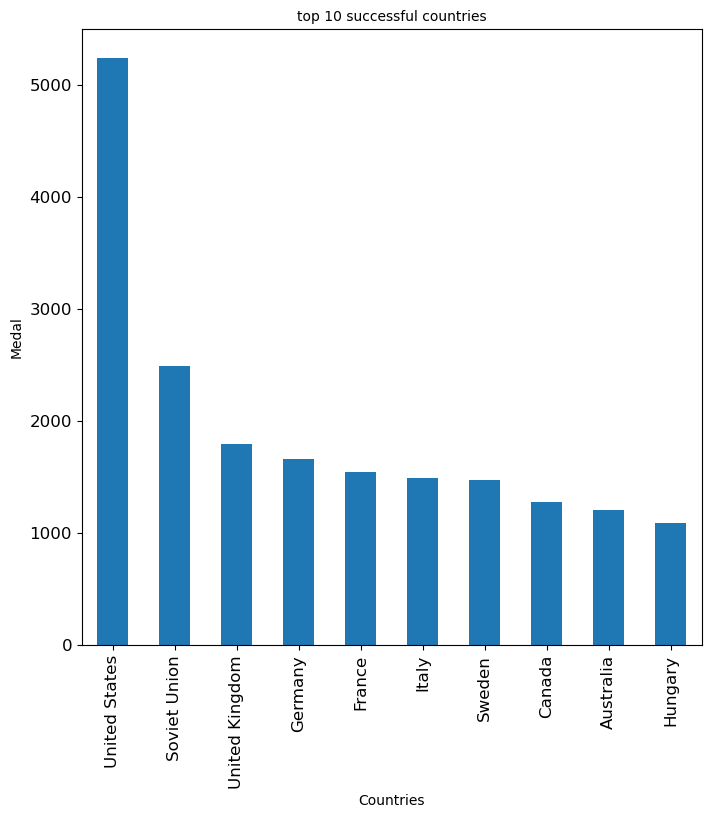

In [23]:
top_10.plot(kind = "bar", figsize = (8,8), fontsize = 12)
plt.title("top 10 successful countries", fontsize = 10)
plt.ylabel("Medal", fontsize = 10)
plt.xlabel("Countries", fontsize = 10)
plt.show()

In [24]:
oly_10 = olympics[olympics.Country.isin(top_10.index)]

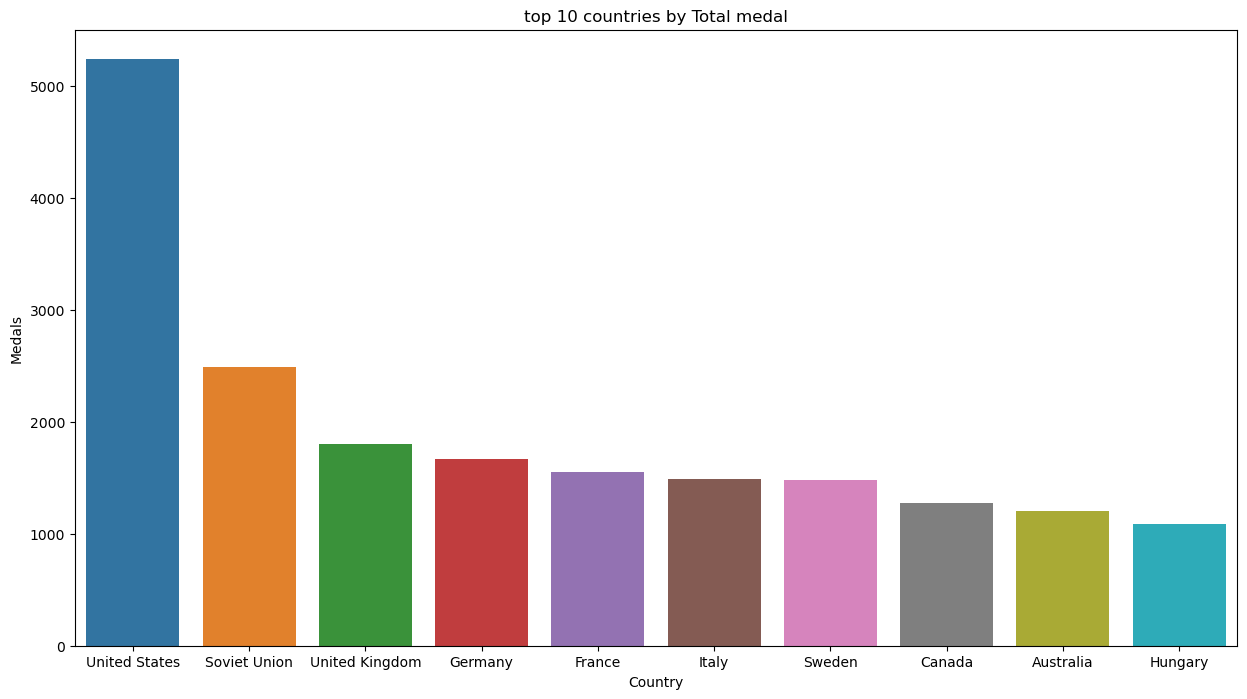

In [25]:
plt.figure(figsize = (15,8))
sns.countplot(data = oly_10, x = "Country", order = top_10.index)
plt.ylabel("Medals")
plt.title("top 10 countries by Total medal")
plt.show()

# 1b. Top 10 Successful countries by Medal count per Edition

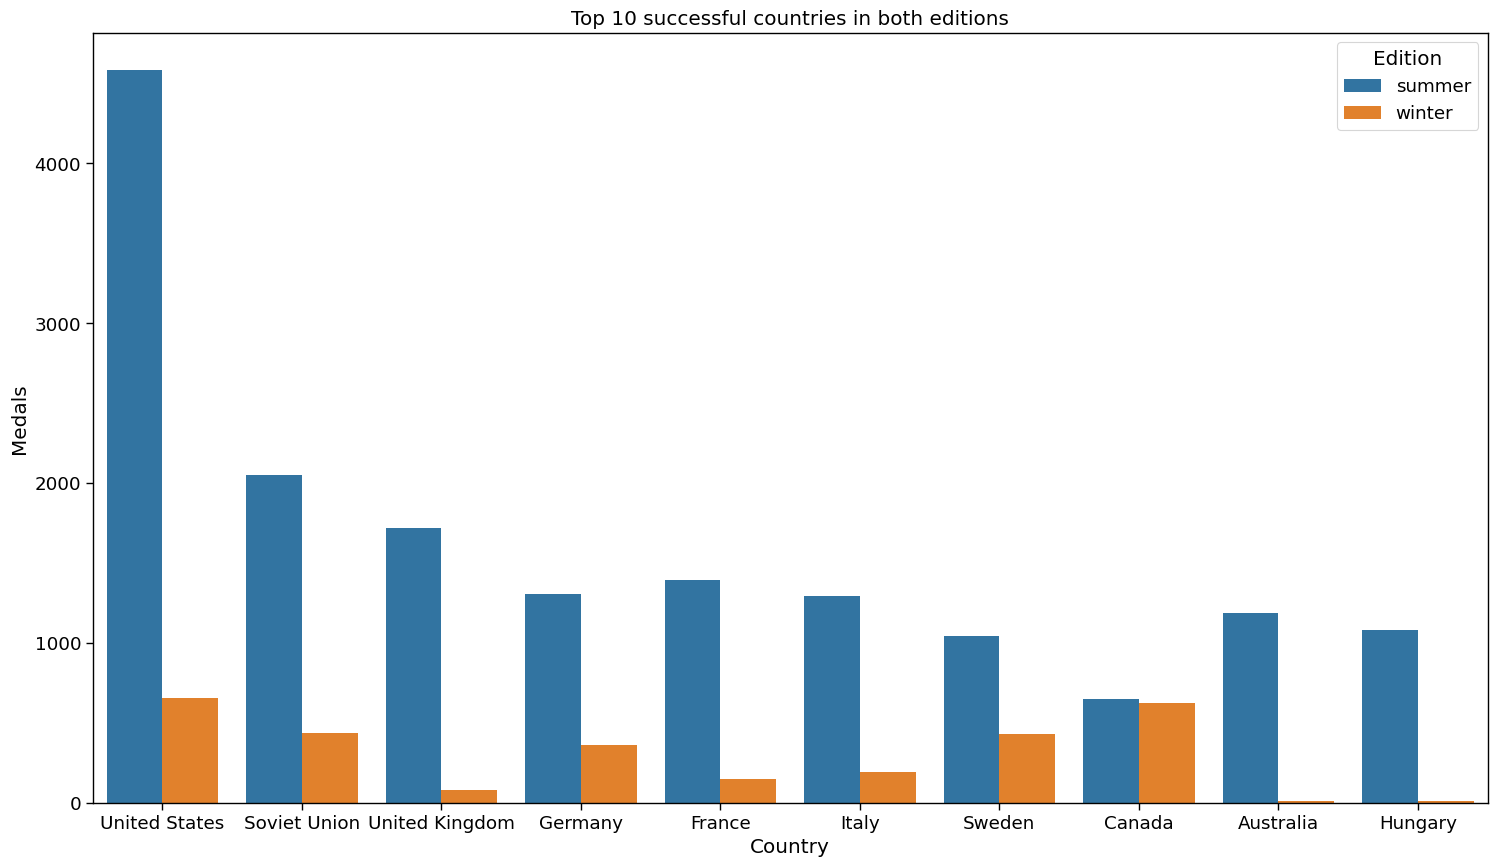

In [26]:
plt.figure(figsize = (18,10))
sns.set_context("paper", font_scale = 1.5)
sns.countplot(data = oly_10, x = "Country", hue = "Edition", dodge = True, order = top_10.index)
plt.title("Top 10 successful countries in both editions")
plt.ylabel("Medals")
plt.show()

# 1C. Top 10 Successful country by Medal Categorization

In [27]:
#Aggregating the olympics df to get the medal categorization per edition per country
Medal_per_Edition = pd.crosstab(olympics.Country, olympics.Medal, values = "Medal", aggfunc = "count")
Medal_per_Edition.sort_values(by = ["Bronze", "Silver", "Gold"], ascending = False).head(5)

Medal,Bronze,Gold,Silver
Country,,,
United States,1265.0,2402.0,1571.0
Soviet Union,677.0,1088.0,724.0
United Kingdom,587.0,580.0,632.0
France,578.0,444.0,526.0
Germany,572.0,589.0,504.0


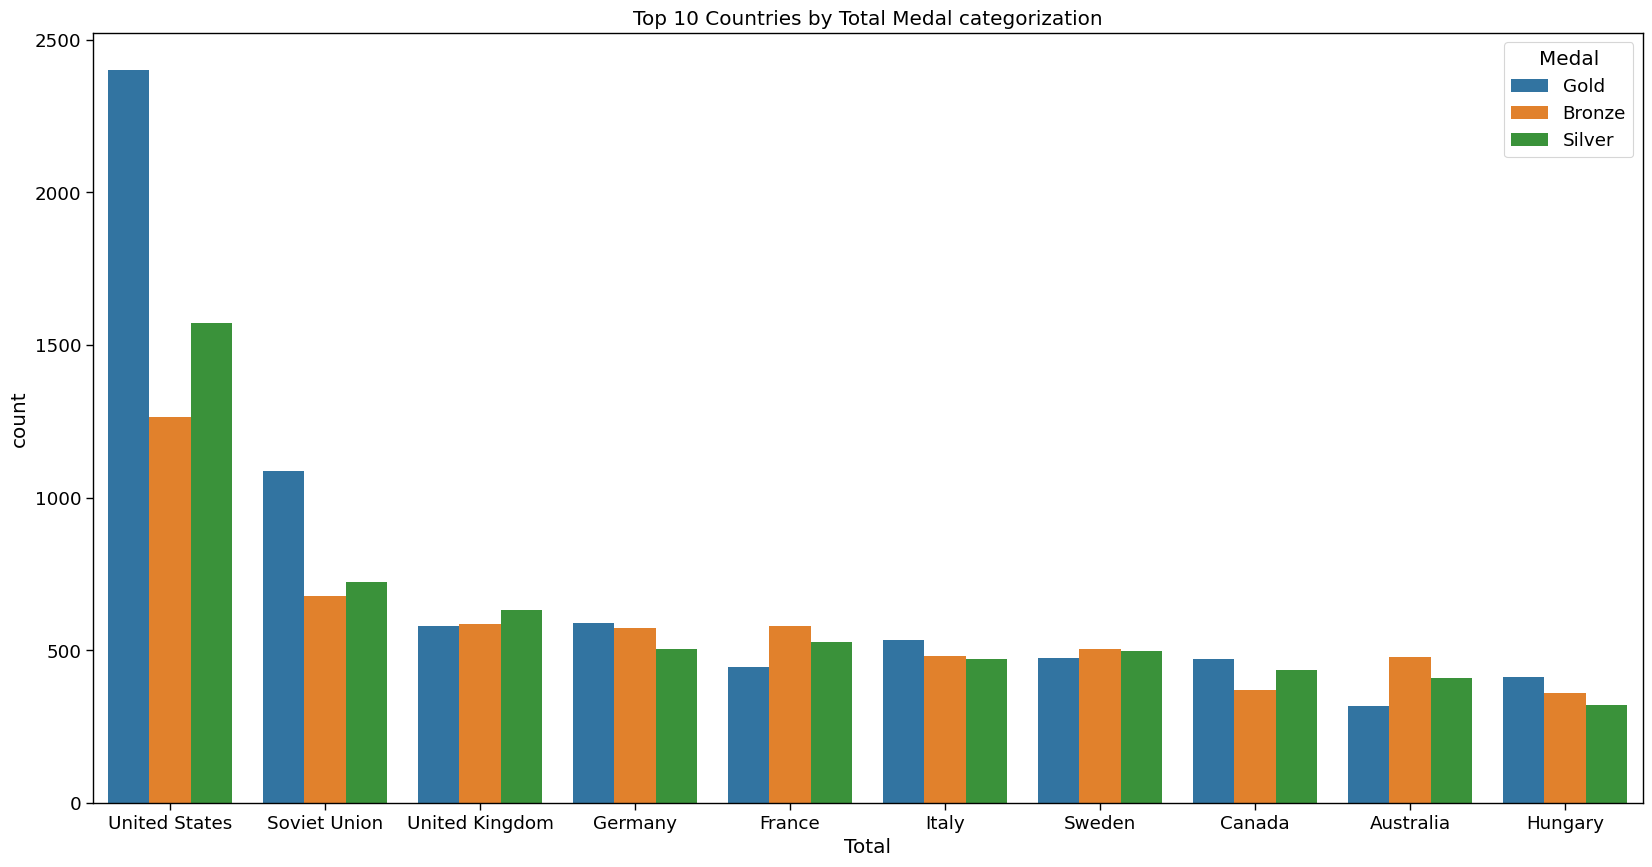

In [28]:
plt.figure(figsize = (20,10))
sns.countplot(data = oly_10, x = "Country", hue = "Medal", order = top_10.index)
plt.xlabel("Country")
plt.xlabel("Total")
plt.title("Top 10 Countries by Total Medal categorization")
plt.show()

# Q2: Gender based performance
          1. Equally successful Men and Women?
          2. Women are more sucsessful?
          3. Men are more successful?

In [29]:
#Aggregating the olympics dataframe to get the top 50 country gender performance
Gender_top50 = olympics.groupby(["Country", "Gender"]).Medal.count().unstack().\
sort_values(by = ["Men", "Women"], ascending = False).head(50)

In [30]:
Gender_top50.head(5)

Gender,Men,Women
Country,,
United States,3618.0,1620.0
Soviet Union,1807.0,682.0
United Kingdom,1470.0,329.0
France,1351.0,197.0
Italy,1292.0,196.0


In [31]:
#ranking the top 50 countries gender performance
Gender_rank50 = Gender_top50.rank(ascending = False, method = "average")
Gender_rank50.head(5)

Gender,Men,Women
Country,,
United States,1.0,1.0
Soviet Union,2.0,2.0
United Kingdom,3.0,11.0
France,4.0,16.5
Italy,5.0,18.0


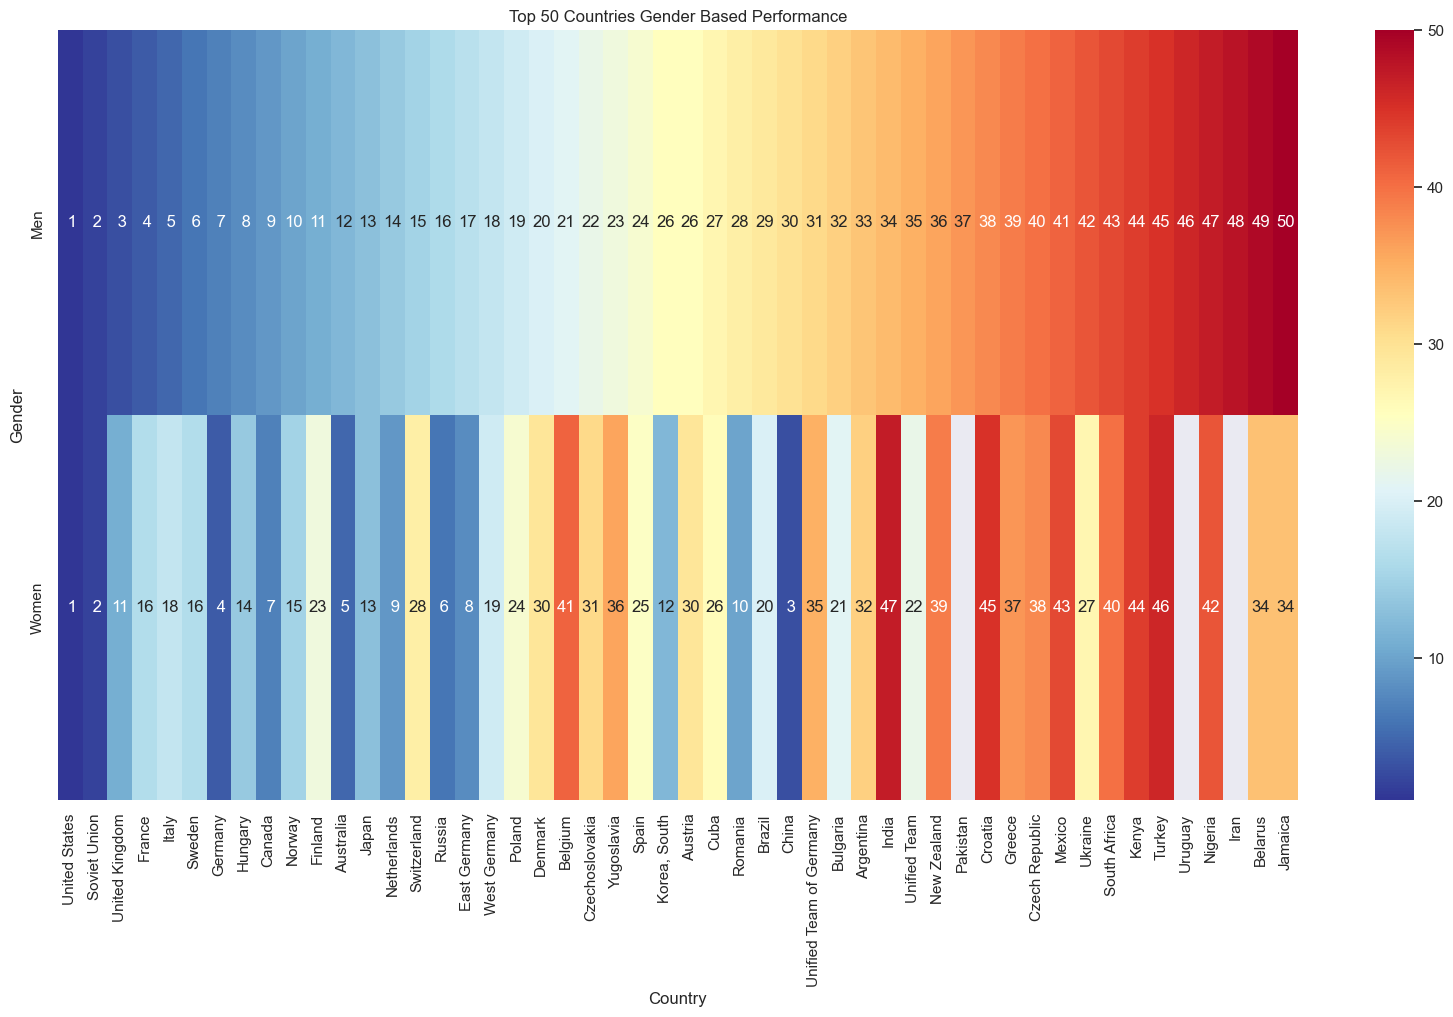

In [32]:
plt.figure(figsize = (20,10))
sns.set(palette = "dark")
sns.heatmap(Gender_rank50.T, annot = True, fmt = "2.0f", cmap = "RdYlBu_r")
plt.title("Top 50 Countries Gender Based Performance")
plt.show()

# Ans: Q2
From the Chart above, it can be shown that some countries have equal or nearly equal Men and Women perfomance like US, SU, Germany, Australia this might probably be due to the gender inclusive nature of these countries. 
Countries like China, Russia, East Germany have more succesful female than male. 

# Q3: Does Geographical location affect performance?
    1. Are there equally successful conutries?
    2. Countries more successful in summer
    3. Countries more successful in winter?

In [33]:
#Aggregating the top 50 country with respect to the editions.
Edition_top50 = pd.crosstab(olympics.Country, olympics.Edition, values = "Medal", aggfunc = "count").\
sort_values(["summer", "winter"], ascending = False).head(50)

In [34]:
#Inspecting the aggregated data
Edition_top50.head()

Edition,summer,winter
Country,,
United States,4585.0,653.0
Soviet Union,2049.0,440.0
United Kingdom,1720.0,79.0
France,1396.0,152.0
Germany,1305.0,360.0


In [35]:
#ranking the performance of the top 50 countries in relation to the edition
Edition_rank50 = Edition_top50.rank(ascending = False, method = "average")
Edition_rank50.head(10)

Edition,summer,winter
Country,,
United States,1.0,1.0
Soviet Union,2.0,4.0
United Kingdom,3.0,19.0
France,4.0,14.0
Germany,5.0,7.0
Italy,6.0,11.0
Australia,7.0,24.5
Hungary,8.0,27.0
Sweden,9.0,6.0


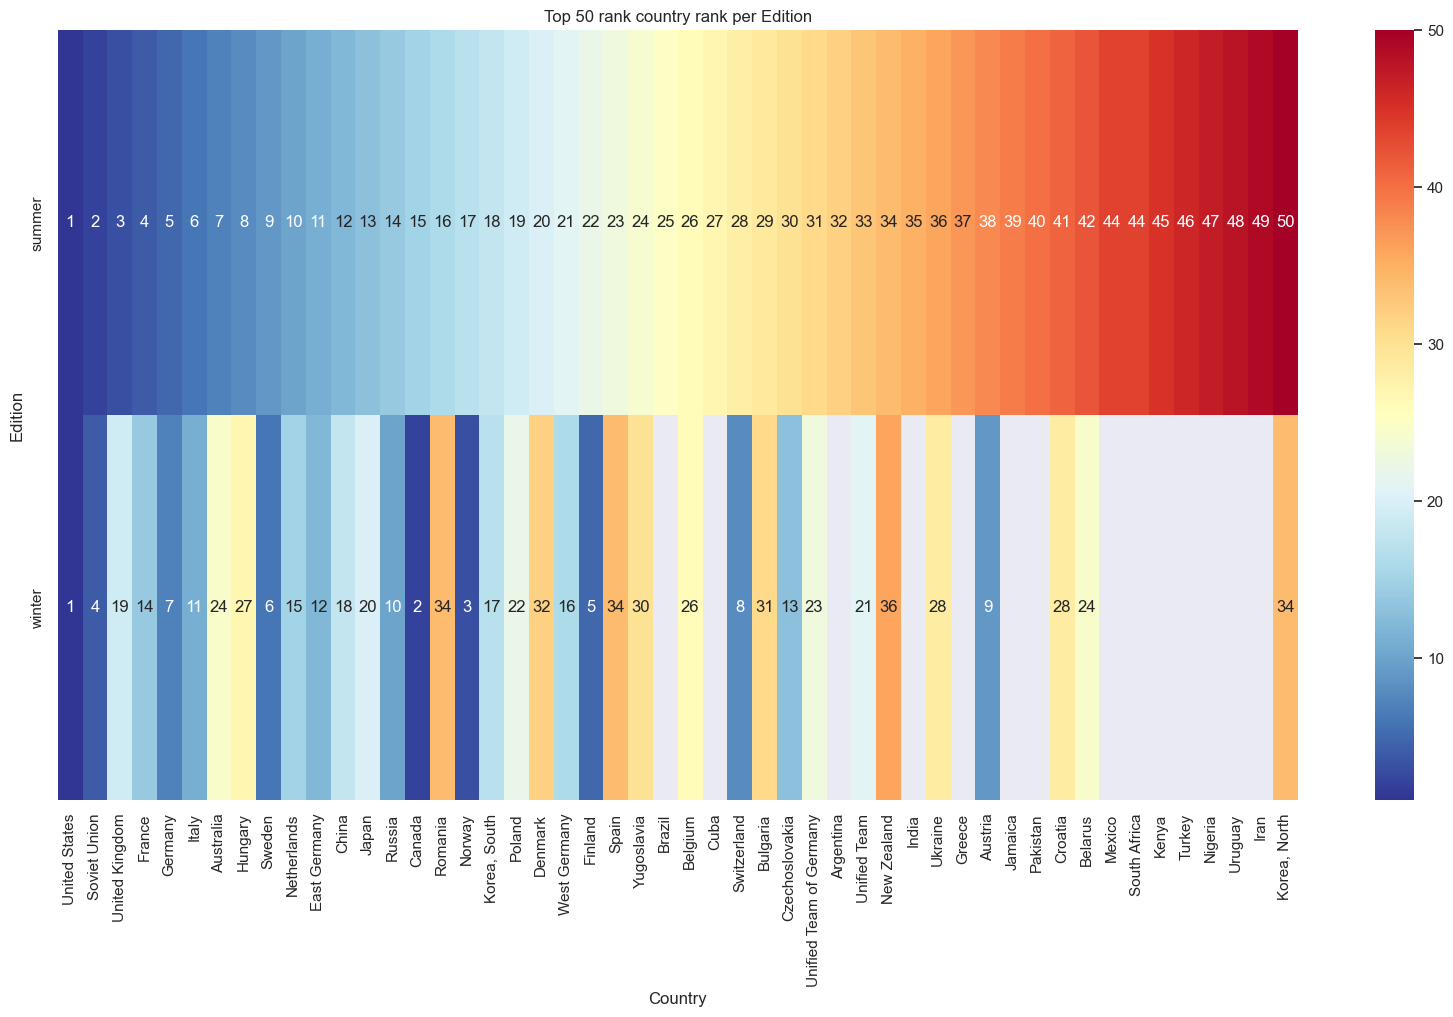

In [36]:
plt.figure(figsize = (20,10))
sns.heatmap(Edition_rank50.T, annot = True, cmap = "RdYlBu_r")
plt.title("Top 50 rank country rank per Edition")
plt.show()

# Ans: Q3
From the plot above, some countries like US, Soviet union performed equally good in both Summer and Winter games. This might br due to the flexible weather conditions of this regions. while countries like Canda, Norway, Sweden performed better in Winter, this might be due to their geographical location in the colder region. However, Countries like United Kingdom, France, Germany, Italy performed better in the Summer.

# Q4: The relationship between Economic parameter and country success
        1. Relationship/correltion between GDP and Total_Medal won
        2.Relationship/correlation between population and Total_Medal won

In [37]:
#using a groupby function to aggregate the country, population, GDP and Medal.
Economy_Impact = olympics.groupby(["Country","Population", "GDP", "Medal"], dropna =False).Medal.count().unstack()\
                .sort_values(by = ["Bronze", "Gold", "Silver"], ascending = False).reset_index()
Economy_Impact.head()

Medal,Country,Population,GDP,Bronze,Gold,Silver
0,United States,321418820.0,56115.718426,1265.0,2402.0,1571.0
1,Soviet Union,NaN,NaN,677.0,1088.0,724.0
2,United Kingdom,65138232.0,43875.969614,587.0,580.0,632.0
3,France,66808385.0,36205.568102,578.0,444.0,526.0
4,Germany,81413145.0,41313.313995,572.0,589.0,504.0


In [38]:
Economy_Impact["Total_Medals"] = Economy_Impact.Bronze + Economy_Impact.Gold + Economy_Impact.Silver
Economy_Impact = Economy_Impact.drop(columns = ["Bronze", "Gold", "Silver"]).set_index("Country")
Economy_Impact.head()

Medal,Population,GDP,Total_Medals
Country,,,
United States,321418820.0,56115.718426,5238.0
Soviet Union,NaN,NaN,2489.0
United Kingdom,65138232.0,43875.969614,1799.0
France,66808385.0,36205.568102,1548.0
Germany,81413145.0,41313.313995,1665.0


In [39]:
Eco_corr = Economy_Impact.corr(method = "spearman")
Eco_corr

Medal,Population,GDP,Total_Medals
Medal,,,
Population,1.000000,-0.238446,0.311295
GDP,-0.238446,1.000000,0.539619
Total_Medals,0.311295,0.539619,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

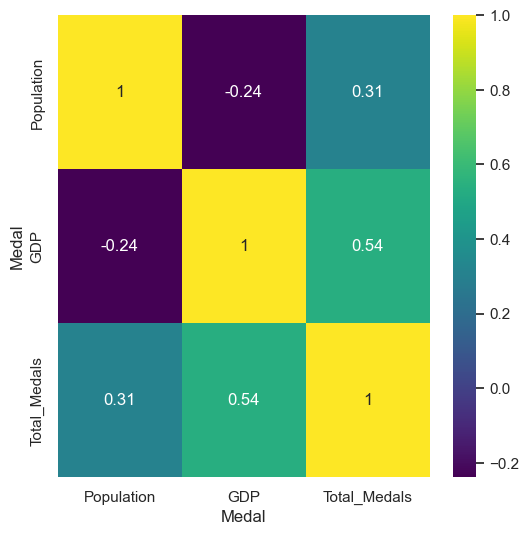

In [40]:
plt.figure(figsize = (6,6))
sns.heatmap(Eco_corr, cmap = "viridis", annot = True)
plt.show

# Ans: Q4
As analysed above there is a good correlation between GDP and Total_Metal/Success of the countries, as this countries will be able to spend more on facilities to train their representatives while also rewarding them appropriately. Also, the weak positive correlation of 0.31 between Population and the sucess of a Country shows that population is nota strong indicator of a country's sucess in Olympics games.

# Note:
    This is a simple/basic explanatory data analysis. Data is missing for some columns like GDP and Population for some countries, this might probably affect the correlation analysis of these parameters. Further deep and advanced statistical analysis might improve some of the analysis results.